In [1]:
#Import pandas and numpy for data manipulation, analysis and numerical operations
import pandas as pd
import numpy as np

# Import matplotlib for visualization
import matplotlib.pyplot as plt

In [3]:
# Load the Dataset 
df = pd.read_csv("news_category.csv")

# View first few rows of dataset
df.head()


,headline,short_description,category,full_text,categoryEncoded
0,"Maury Wills, Base-Stealing Shortstop For Dodge...","Maury Wills, who helped the Los Angeles Dodger...",SPORTS,maury wills base steal shortstop dodgers die m...,2
1,Golden Globes Returning To NBC In January Afte...,"For the past 18 months, Hollywood has effectiv...",ENTERTAINMENT,golden globe return nbc january year air past ...,0
2,Biden Says U.S. Forces Would Defend Taiwan If ...,President issues vow as tensions with China rise.,POLITICS,biden say USA force defend taiwan china inva...,1
3,‘Beautiful And Sad At The Same Time’: Ukrainia...,An annual celebration took on a different feel...,POLITICS,beautiful sad time ukrainian cultural festival...,1
4,"Las Vegas Aces Win First WNBA Title, Chelsea G...",Las Vegas never had a professional sports cham...,SPORTS,las vegas aces win wnba title chelsea gray nam...,2


##### Data Visualization

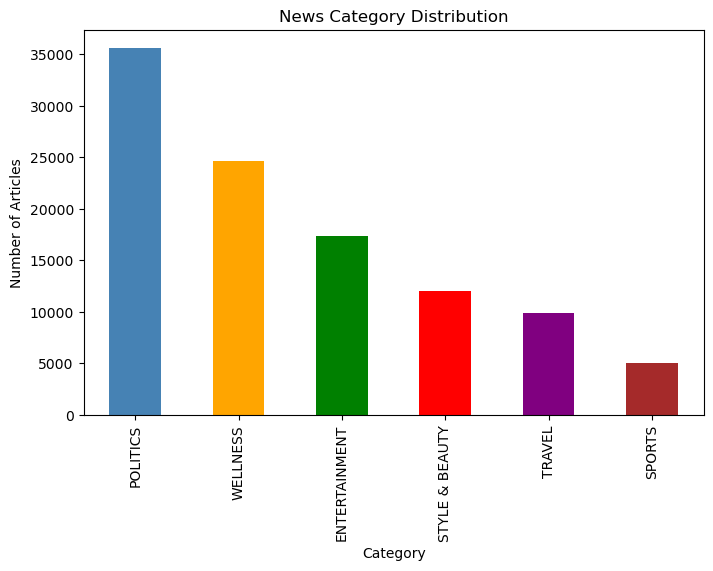

In [6]:
# Data visualization on distribution of news categories.
plt.figure(figsize=(8,5))
df['category'].value_counts().plot(
    kind='bar',
    color=['steelblue', 'orange', 'green', 'red', 'purple', 'brown']
)

plt.title("News Category Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Articles")
plt.show()


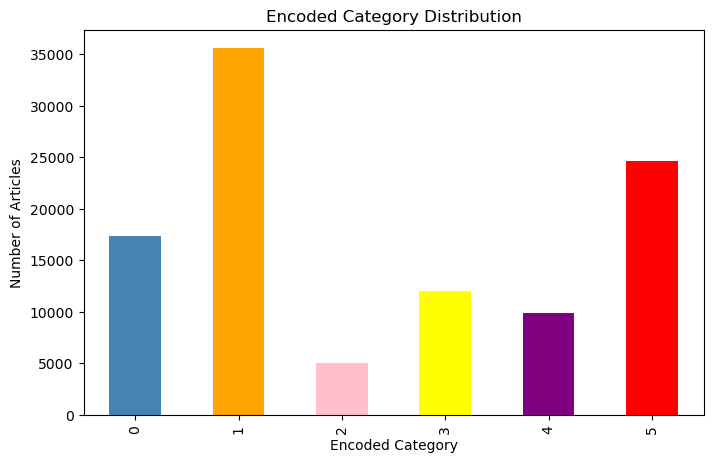

In [8]:
# Data visualization on distribution of encoded category distribution.
plt.figure(figsize=(8,5))
df['categoryEncoded'].value_counts().sort_index().plot(
    kind='bar',
    color=['steelblue', 'orange', 'pink', 'yellow', 'purple', 'red']
)

plt.title("Encoded Category Distribution")
plt.xlabel("Encoded Category")
plt.ylabel("Number of Articles")
plt.show()

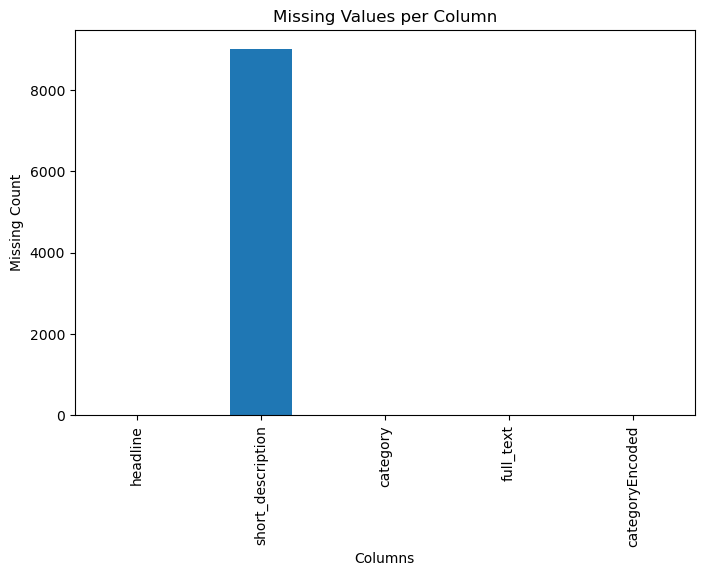

In [10]:
# Data visualization on distribution of missing value analysis.
plt.figure(figsize=(8,5))
df.isnull().sum().plot(kind='bar')

plt.title("Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Missing Count")

plt.show()

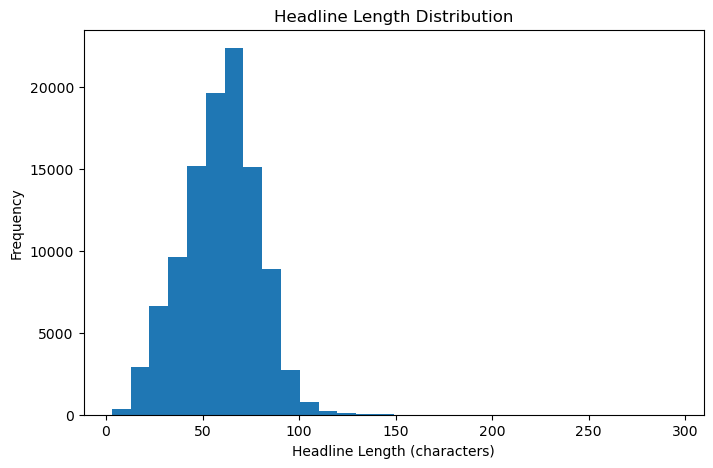

In [12]:
# Data visualization on distribution of headline distribution by length.
df['headline_length'] = df['headline'].str.len()

plt.figure(figsize=(8,5))
df['headline_length'].plot(kind='hist', bins=30)

plt.title("Headline Length Distribution")
plt.xlabel("Headline Length (characters)")
plt.ylabel("Frequency")

plt.show()

#### Exploratory Data Analysis and Data Cleaning

In [15]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104648 entries, 0 to 104647
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   headline           104647 non-null  object 
 1   short_description  95627 non-null   object 
 2   category           104648 non-null  object 
 3   full_text          104637 non-null  object 
 4   categoryEncoded    104648 non-null  int64  
 5   headline_length    104647 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ MB


In [17]:
# Count the number of news articles in each category
df["category"].value_counts()

category
POLITICS          35602
WELLNESS          24639
ENTERTAINMENT     17362
STYLE & BEAUTY    12068
TRAVEL             9900
SPORTS             5077
Name: count, dtype: int64

In [19]:
# Count the frequency of each encoded category label
df["categoryEncoded"].value_counts()

categoryEncoded
1    35602
5    24639
0    17362
3    12068
4     9900
2     5077
Name: count, dtype: int64

In [21]:
# Calculate the length of each news article and display statistical summary of text length
df["text_length"] = df["full_text"].apply(lambda x: len(str(x).split()))
df["text_length"].describe()

count    104648.000000
mean         16.128622
std           6.699121
min           0.000000
25%          12.000000
50%          16.000000
75%          20.000000
max         123.000000
Name: text_length, dtype: float64

In [23]:
# Checking for missing values in each columns
df.isnull().sum()

headline                1
short_description    9021
category                0
full_text              11
categoryEncoded         0
headline_length         1
text_length             0
dtype: int64

In [25]:
#Removing rows where full_text has missing values
df = df.dropna(subset=["full_text"])

In [27]:
# Checking if missing values are removed or not
df.isnull().sum()

headline                1
short_description    9010
category                0
full_text               0
categoryEncoded         0
headline_length         1
text_length             0
dtype: int64

In [29]:
# Display the shape of the dataset after removing missing values
print(df.shape)

(104637, 7)


In [31]:
# Display the first three cleaned full_text entries
df["full_text"].head(3)

0    maury wills base steal shortstop dodgers die m...
1    golden globe return nbc january year air past ...
2    biden say  USA  force defend taiwan china inva...
Name: full_text, dtype: object

#### Input Features and Target Labels

In [34]:
# Define input feature
X = df["full_text"]      

# Define target label
y = df["categoryEncoded"] 

#### Train-Test Split

In [37]:
# Import train-test split and TF-IDF vectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
# Print number of samples
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 83709
Testing samples: 20928


In [41]:
# Convert text data into numerical form using TF-IDF
tfidf = TfidfVectorizer(stop_words="english", max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("Training TF-IDF shape:", X_train_tfidf.shape)
print("Testing TF-IDF shape:", X_test_tfidf.shape)

Training TF-IDF shape: (83709, 5000)
Testing TF-IDF shape: (20928, 5000)


#### Logistic Regression

In [44]:
# Import Logistic Regression model and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
# Initialize Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the model using training data
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [47]:
# Predict categories for test data
y_pred_lr = lr_model.predict(X_test_tfidf)

In [50]:
# Calculate accuracy of Logistic Regression model
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.8739965596330275


In [52]:
# Display detailed classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_lr))


Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      3456
           1       0.91      0.94      0.92      7199
           2       0.84      0.68      0.75      1023
           3       0.89      0.82      0.85      2384
           4       0.88      0.82      0.85      1954
           5       0.87      0.90      0.88      4912

    accuracy                           0.87     20928
   macro avg       0.87      0.83      0.85     20928
weighted avg       0.87      0.87      0.87     20928



In [54]:
# Predict category for a new sample news headline
sample_news = ["Government announces new education policy"]

sample_tfidf = tfidf.transform(sample_news)

lr_prediction = lr_model.predict(sample_tfidf)

print("Predicted Category Encoded (Logistic Regression):", lr_prediction)

Predicted Category Encoded (Logistic Regression): [1]


#### Multinomial Naive Bayes

In [57]:
# Import Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [59]:
# Initialize Naive Bayes model
nb_model = MultinomialNB()

In [61]:
# Train the Naive Bayes model
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [63]:
# Predict categories using Naive Bayes
y_pred_nb = nb_model.predict(X_test_tfidf)

In [65]:
# Calculate Naive Bayes accuracy
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.8560779816513762


In [67]:
# Display classification report for Naive Bayes
print("Classification Report:\n")
print(classification_report(y_test, y_pred_nb))

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      3456
           1       0.87      0.94      0.91      7199
           2       0.87      0.53      0.66      1023
           3       0.87      0.78      0.83      2384
           4       0.87      0.78      0.83      1954
           5       0.84      0.90      0.87      4912

    accuracy                           0.86     20928
   macro avg       0.86      0.79      0.82     20928
weighted avg       0.86      0.86      0.85     20928



In [69]:
# Predict category for sample news using Naive Bayes
sample_news = ["Government announces new education policy"]

sample_tfidf = tfidf.transform(sample_news)
nb_prediction = nb_model.predict(sample_tfidf)

print("Predicted Category Encoded (Naive Bayes):", nb_prediction)

Predicted Category Encoded (Naive Bayes): [1]


#### Support Vector Machine (SVM)

In [72]:
# Import SVM classifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

In [74]:
# Initialize SVM model
svm_model = LinearSVC()

In [76]:
# Train SVM model
svm_model.fit(X_train_tfidf, y_train)

LinearSVC()

In [78]:
# Predict categories using SVM
y_pred_svm = svm_model.predict(X_test_tfidf)

In [80]:
# Calculate SVM accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.8749044342507645


In [82]:
# Display classification report for SVM
print("Classification Report:\n")
print(classification_report(y_test, y_pred_svm))

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3456
           1       0.92      0.93      0.92      7199
           2       0.82      0.71      0.76      1023
           3       0.87      0.84      0.85      2384
           4       0.86      0.84      0.85      1954
           5       0.87      0.90      0.88      4912

    accuracy                           0.87     20928
   macro avg       0.86      0.84      0.85     20928
weighted avg       0.87      0.87      0.87     20928



In [84]:
# Predict category for sample news using SVM
sample_news = ["Government announces new education policy"]

sample_tfidf = tfidf.transform(sample_news)
svm_prediction = svm_model.predict(sample_tfidf)

print("Predicted Category Encoded (SVM):", svm_prediction)

Predicted Category Encoded (SVM): [1]


#### Confusion Matrix

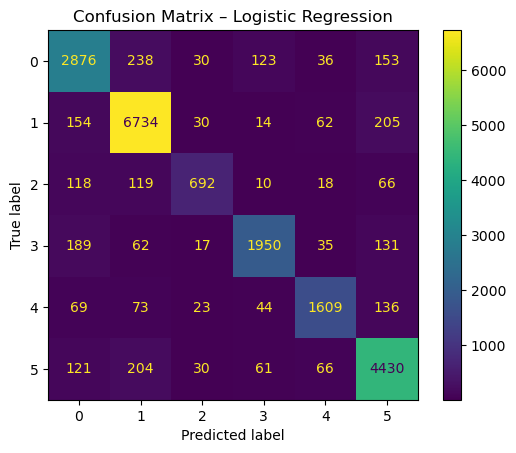

In [87]:
# Display confusion matrix for Logistic Regression model
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_lr
)
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

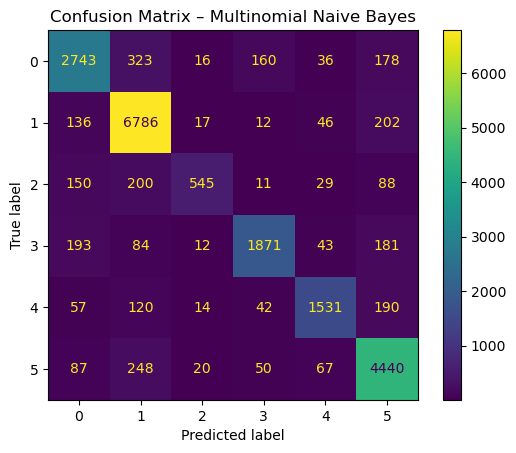

In [89]:
# Display confusion matrix for Multinomial Naive Bayes model
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_nb
)
plt.title("Confusion Matrix – Multinomial Naive Bayes")
plt.show()

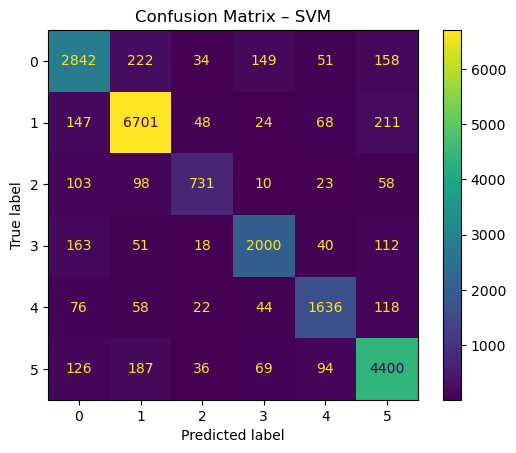

In [91]:
# Display confusion matrix for SVM model
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_svm
)
plt.title("Confusion Matrix – SVM")
plt.show()

#### Model Comparison

In [94]:
# Import evaluation metrics for moel performance comparison
from sklearn.metrics import precision_score, recall_score, f1_score

# Creating a DataFrame to store accuracy, precision, recall and F1-score for each model
metrics_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Naive Bayes", "SVM"],
    "Accuracy": [
        lr_accuracy,
        nb_accuracy,
        svm_accuracy
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr, average="macro"),
        precision_score(y_test, y_pred_nb, average="macro"),
        precision_score(y_test, y_pred_svm, average="macro")
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr, average="macro"),
        recall_score(y_test, y_pred_nb, average="macro"),
        recall_score(y_test, y_pred_svm, average="macro")
    ],
    "F1-score": [
        f1_score(y_test, y_pred_lr, average="macro"),
        f1_score(y_test, y_pred_nb, average="macro"),
        f1_score(y_test, y_pred_svm, average="macro")
    ]
})

# Displays the performance comparison table
metrics_df

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.873997,0.865897,0.831215,0.846552
1,Naive Bayes,0.856078,0.858244,0.790219,0.816137
2,SVM,0.874904,0.859499,0.839946,0.848985


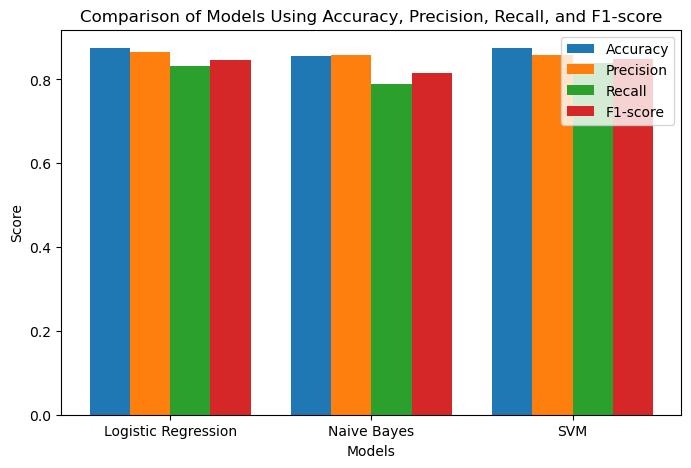

In [96]:
# Plot a grouped bar chart to compare models using evaluation metrics
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(len(metrics_df["Model"]))
width = 0.2

plt.figure(figsize=(8,5))

plt.bar(x - 1.5*width, metrics_df["Accuracy"], width, label="Accuracy")
plt.bar(x - 0.5*width, metrics_df["Precision"], width, label="Precision")
plt.bar(x + 0.5*width, metrics_df["Recall"], width, label="Recall")
plt.bar(x + 1.5*width, metrics_df["F1-score"], width, label="F1-score")

plt.xticks(x, metrics_df["Model"])
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Comparison of Models Using Accuracy, Precision, Recall, and F1-score")
plt.legend()

plt.show()